# Programming for data science - exercise session 3 (Python)

## Ancora dizionari

Ricordiamo che i dizionari funzionano in base allo schema: chiave -> valore

Per testare l'esistenza all'interno di un dizionario di una data chiave, si procede in modo analogo alle liste (o ai set..), usando "__in__":

In [1]:
rubrica = {'Tizio': 1234, 'Caio': 5678}
if 'Tizio' in rubrica:
    print(rubrica['Tizio'])

if 'Sempronio' in rubrica:
    print(rubrica['Sempronio'])
else:
    print("Sempronio non presente in rubrica")

1234
Sempronio non presente in rubrica


## E tuple

Le tuple sono una struttura dati molto simile alle liste, con la differenza che sono immutabili (come le stringhe). Una volta assegnato un valore ad una tupla, questa non può essere modificata:

In [2]:
tup = (0, 1)
print(tup[0], tup[1])

0 1


In [3]:
tup[0] = 45

TypeError: 'tuple' object does not support item assignment

Per saperne di più, info al seguente link: http://getpython3.com/diveintopython3/native-datatypes.html#tuples

## Esercizio 1: combinazioni dei dadi

Lanciando 2 dadi, la somma che potremmo ottenere vanno da 2 a 12. Tuttavia le combinazioni per ottenere questi 11 valori sono 36. 
Costruire un dizionario che abbia come chiavi le somme (da 2 a 12) e come valori la __lista__ dei numeri che ci da la corrispondente somma.

Hint:
 - ogni combinazione di 2 elementi può essere salvata in una tupla
 
Esempio:

    combinazioni = dict()
    combinazioni[2] = [(1, 1)]
    combinazioni[3] = [(2, 1), (1, 2)]
    combinazioni[4] = [(1, 3), (2, 2), (3, 1)]

In [4]:
combinazioni = dict()   # creiamo il dizionario

for i in range(1, 7):      # inizializziamo il ciclo esterno (i in [1-6])
    for j in range(1, 7):  # inizializziamo il ciclo interno (j in [1-6])
        somma = i + j      # definiamo la somma che sarà la chiave del dizionario
        if somma not in combinazioni:
            # se la somma corrente non è all'interno del dizionario
            # allora dobbiamo creare la lista con la corrispondente
            # chiave (la somma stessa)
            combinazioni[somma] = list()      # inizializziamo la lista
            tupla = (i, j)                    # definiamo la tupla
            combinazioni[somma].append(tupla) # aggiungiamo la tupla alla lista appena creata
        else:
            # se la somma è già presente come chiave all'interno
            # del dizionario, allora dobbiamo solo creare la tupla
            # con i valori dei dadi e aggiungerla alla lista di
            # valori che ci danno quella somma
            tupla = (i, j)
            combinazioni[somma].append(tupla)

print(combinazioni)

{2: [(1, 1)], 3: [(1, 2), (2, 1)], 4: [(1, 3), (2, 2), (3, 1)], 5: [(1, 4), (2, 3), (3, 2), (4, 1)], 6: [(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)], 7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)], 8: [(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)], 9: [(3, 6), (4, 5), (5, 4), (6, 3)], 10: [(4, 6), (5, 5), (6, 4)], 11: [(5, 6), (6, 5)], 12: [(6, 6)]}


Se non è chiaro il comportamento di 2 cicli "for" annidati, possiamo visualizzarlo nel seguente modo:

In [5]:
for i in range(3):
    for j in range(3, 6):
        print("i={}, j={}".format(i, j))

i=0, j=3
i=0, j=4
i=0, j=5
i=1, j=3
i=1, j=4
i=1, j=5
i=2, j=3
i=2, j=4
i=2, j=5


## Lettura di file

Supponiamo ora di voler sapere quali sono le parole più frequenti nell'Inferno di Dante (gentilmente concesso dal progetto Gutenberg, https://www.gutenberg.org/ebooks/997):

In [6]:
import string                       # importiamo questa libreria che ci servirà per rimuovere la punteggiatura
exclude = set(string.punctuation)   # salviamo la punteggiatura in un set
print("Punteggiatura", exclude)
dizionario = dict()                 # inizializziamo il dizionario che conterrà tutte le parole dell'"Inferno"

with open("pg997.txt", 'r') as inferno:                      # apriamo il file in modalità 'reading'
    for num_riga, riga in enumerate(inferno):                # scorriamo il file riga per riga
        if len(riga) > 1:                                    # se abbiamo parole nella riga corrente.. 
            s = riga.lower()                                 # convertiamo tutte i caratteri in lettere minuscole
            s = ''.join(ch for ch in s if ch not in exclude) # rimuoviamo la punteggiatura
            parole = s.split()                               # splittiamo la frase
            for parola in parole:                            # scorriamo le parole nella frase
                if parola in dizionario:                     # se la parola è già all'interno del dizionario..
                    dizionario[parola] += 1                  # aumentiamo il suo valore
                else:
                    dizionario[parola] = 1                   # altrimenti lo settiamo a 1
            
print("Totale parole distinte nell'Inferno:", len(dizionario))

Punteggiatura {"'", ')', ',', '>', '<', '_', '\\', '[', '}', '@', '~', ';', '$', '%', '|', '=', '`', '.', '?', '*', ':', '(', '#', ']', '{', '+', '"', '&', '-', '/', '!', '^'}
Totale parole distinte nell'Inferno: 7473


Come procedere ora? I dizionari sono delle strutture dati che non preservano l'ordine. E' possibile però ottenere una rappresentazione diversa, ad esempio una lista, convertendo il dizionario:

In [7]:
x = dict()
x[1] = 2
x[3] = 4
x[4] = 3
x[2] = 1
x[0] = 0
# questa scrittura sarebbe stata equivalente: x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
it = x.items()
print(it)

dict_items([(1, 2), (3, 4), (4, 3), (2, 1), (0, 0)])


Dopodiché possiamo usare il metodo sorted, già visto in precedenza. Il problema è che per ogni item abbiamo 2 elementi (chiave, valore), mentre quello che vogliamo è un ordinamento basato soltanto sui valori. In questo caso basta specificare un parametro in più

### Operator: itemgetter() - https://docs.python.org/3/library/operator.html

 - Return a callable object that fetches item from its operand using the operand’s __getitem__() method.

 - The items can be any type accepted by the operand’s __getitem__() method.
 
Per ordinare il dizionario, lo trasformiamo in una lista di 

In [8]:
import operator
x = {'abaco': 2, 'dado': 4, 'ente': 3, 'bolla': 1, 'cane': 0}
print(x.items())

dict_items([('abaco', 2), ('dado', 4), ('ente', 3), ('bolla', 1), ('cane', 0)])


In [9]:
print(sorted(x.items(), key=operator.itemgetter(1))) # in questo modo ordiniamo rispetto ai valori
print(sorted(x.items(), key=operator.itemgetter(0))) # in questo modo ordiniamo rispetto alle chiavi

[('cane', 0), ('bolla', 1), ('abaco', 2), ('ente', 3), ('dado', 4)]
[('abaco', 2), ('bolla', 1), ('cane', 0), ('dado', 4), ('ente', 3)]


In [10]:
import operator
sorted_diz = sorted(dizionario.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_diz[:200])

[('e', 1567), ('che', 1267), ('la', 885), ('a', 673), ('di', 628), ('si', 561), ('non', 491), ('per', 438), ('l', 413), ('in', 328), ('le', 304), ('li', 304), ('mi', 291), ('con', 255), ('se', 252), ('de', 225), ('tu', 219), ('lo', 218), ('ne', 198), ('il', 193), ('io', 191), ('da', 189), ('piu', 181), ('come', 181), ('al', 173), ('ma', 161), ('del', 157), ('i', 148), ('chi', 148), ('me', 134), ('quel', 127), ('un', 126), ('poi', 125), ('disse', 112), ('fu', 109), ('su', 107), ('mio', 106), ('quando', 105), ('or', 104), ('nel', 102), ('gia', 102), ('cosi', 101), ('o', 98), ('ti', 98), ('lui', 95), ('noi', 94), ('son', 91), ('lor', 87), ('maestro', 78), ('the', 76), ('vidi', 76), ('suo', 75), ('quella', 74), ('chio', 74), ('era', 69), ('sua', 68), ('tutto', 68), ('qual', 66), ('giu', 66), ('ed', 65), ('dal', 63), ('qui', 63), ('perche', 61), ('duca', 61), ('of', 60), ('poco', 60), ('tanto', 59), ('ancor', 58), ('ben', 57), ('tra', 57), ('you', 55), ('dove', 55), ('terra', 55), ('to', 54

Come possiamo vedere, le parole più frequenti non sono particolarmente significative. Per avere un risultato migliore dovremmo rimuovere le cosiddette "stopwords"..

## Extra - visualizzazione delle parole

Per poter visualizzare le parole più frequenti possiamo utilizzare una libreria python, chiamata wordcloud (https://github.com/conda-forge/wordcloud-feedstock), insieme a matplotlib, la libreria che viene utilizzata per i grafici:

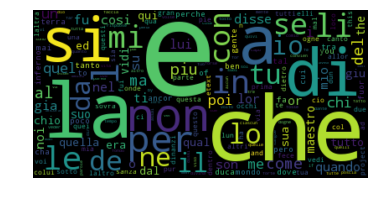

In [11]:
%matplotlib inline
# il comando sopra ci permette di visualizzare il plot all'interno della cella

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud().generate_from_frequencies(dizionario)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Numpy - vettori

Numpy è una libreria pensata per il calcolo scientifico e di conseguenza adottata anche in data science per la manipolazione di dati in forma numerica.

La struttura dati più comune è sicuramente l'_array_:

In [12]:
import numpy as np
np.random.seed(42);

vettore = np.array([1, 2, 3])
print(vettore)

[1 2 3]


In primo luogo l'_array_ di numpy potrebbe sembrare uguale ad una lista, tuttavia la sua implementazione interna lo rende molto diverso da una lista. In particolare, tutte le operazioni matematiche sono implementate in modo tale da essere molto più performanti, usando la cosiddetta "vettorizzazione": invece di usare un ciclo "for" per processare un array di N elementi uno alla volta, la "vettorizzazione" ci permette di applicare la stessa operazione a più elementi contemporaneamente:

In [13]:
vettore = np.arange(10)
print(vettore)
print(vettore + 10)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


Per la creazione del vettore abbiamo usato il metodo _np.arange(..)_, che è molto simile al normale _range(..)_:

In [14]:
help(np.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

Proviamo a fare ciò che abbiamo fatto sopra con una lista:

In [15]:
lista = list(range(10))
print(lista)
print(lista + 10)         # questa operazione viene interpretata come una concanetazione di liste

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


TypeError: can only concatenate list (not "int") to list

Il modo corretto di fare questa operazione è ovviamente usando un ciclo "for":

In [16]:
for i in range(10):
    lista[i] += 10
    
print(lista)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Possiamo fare un confronto sulla velocità di esecuzione, utilizzando il comando _timeit_ preceduto da %%, in modo tale da misurare il tempo di esecuzione dell'intera cella (al contrario, usando soltanto %, verrà misurato il tempo di esecuzione di una sola riga):

In [17]:
%%timeit
vettore = np.arange(10**6)
vettore = vettore + 10

100 loops, best of 3: 5.34 ms per loop


In [18]:
%%timeit
lista = list(range(10**6))
for i in range(10**6):
    lista[i] += 10

1 loop, best of 3: 146 ms per loop


## Esercizio 2: normalizzare un vettore

In questo esercizio generiamo un vettore di numeri random. Una volta che abbiamo un vettore vogliamo "normalizzarlo", cioè far sì che la somma di tutti i suoi elementi sia 1.

Nota: funzioni che abbiamo già visto, come ad esempio max(), sum() e len(), continuano a funzionare.

In [19]:
numeri = np.arange(10, 20)        # creiamo un vettore con numeri da 10 a 19
print("Prima della normalizzazione:")
print(numeri)
print("somma:", sum(numeri))
numeri = numeri / sum(numeri)     # dividiamo ogni numero per la somma totale di tutti
print("Dopo la normalizzazione:")
print(numeri)
print("somma:", sum(numeri))

Prima della normalizzazione:
[10 11 12 13 14 15 16 17 18 19]
somma: 145
Dopo la normalizzazione:
[ 0.06896552  0.07586207  0.08275862  0.08965517  0.09655172  0.10344828
  0.11034483  0.11724138  0.12413793  0.13103448]
somma: 1.0


## Numpy - matrici

Le matrici in numpy possono essere pensate come degli _array_ bidimensionali:

In [20]:
matrice = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

vettore = np.arange(3)
print(matrice)
print("\n")
print(vettore)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


[0 1 2]


Come già detto prima, alcune funzioni come ad esempio max(), sum() e len(), continuano a funzionare:

In [21]:
print("sum:", sum(vettore))
print("len:", len(vettore))
print("max:", max(vettore))

sum: 3
len: 3
max: 2


Cosa succede invece con una matrice?

In [22]:
print("sum:", sum(matrice))
print("len:", len(matrice))
print("max:", max(matrice))

sum: [22 26 30]
len: 4


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Con le matrici il compito è meno chiaro: potremmo volere la somma di tutti gli elementi nella matrice, oppure solo delle righe o solo delle colonne. Allo stesso modo per il massimo. _len_ invece ci restituisce il numero di righe. Come fare se volessimo conoscere anche il numero di colonne? 

In realtà, la maggior parte di queste funzioni sono implementate anche in numpy in modo da poter essere applicate sugli _array_ in modo corretto: 

In [23]:
print("sum:", np.sum(vettore))
print("len:", vettore.shape)
print("max:", np.max(vettore))

sum: 3
len: (3,)
max: 2


_shape_ in particolare, ci restituisce una __tupla__ con le dimensioni dell'oggetto. Vediamo con le matrici:

In [24]:
print("sum:", np.sum(matrice))
print("dimensioni:", matrice.shape)
print("max:", np.max(matrice))

sum: 78
dimensioni: (4, 3)
max: 12


In caso di default, le funzioni _np.sum()_ e _np.max()_ vengono applicate pensando alla matrice come ad un vettore:

In [25]:
matrice.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Come già detto prima, potremmo essere interessati ad operazioni lungo le righe o le colonne. In questo caso è possibile specificare l'argomento _axis_ nella funzione, 0 per le colonne e 1 per le righe:

In [26]:
print(matrice)
print("columns sum:", np.sum(matrice, axis=0))
print("columns max:", np.max(matrice, axis=0))
print("rows sum:", np.sum(matrice, axis=1))
print("rows max:", np.max(matrice, axis=1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
columns sum: [22 26 30]
columns max: [10 11 12]
rows sum: [ 6 15 24 33]
rows max: [ 3  6  9 12]


## Esercizio 3: normalizzare le colonne di una matrice

Estendiamo ora l'esercizio 2 al caso matriciale: abbiamo una matrice generata in modo random e vogliamo normalizzare le colonne di questa matrice, in modo che la somma degli elementi all'interno di ciascuna colonna sia 1.

In [27]:
matrice = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
print("matrice: \n", matrice)

# esercizio 3
somme = np.sum(matrice, axis=0)  # definiamo il vettore delle somme di ciascuna colonna
print("columns sum: \n", somme)
print(somme.shape)
matrice = matrice / somme        # dividiamo ogni colonna per la corrispondente somma
print("check: \n", np.sum(matrice, axis=0))  # controlliamo che il risultato sia corretto

matrice: 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
columns sum: 
 [22 26 30]
(3,)
check: 
 [ 1.  1.  1.]


## Esercizio 4: normalizzare le righe di una matrice

Uguale all'esercizio precedente, ma invece delle colonne normalizziamo le righe.

Note: i vettori di default sono interpretati come vettori riga.

In [28]:
matrice = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

print("matrice originale: \n", matrice)

# esercizio 4
somme = np.sum(matrice, axis=1)
print("\n")
print("somma delle righe: \n", somme)
print(somme.shape)
somme = somme[..., np.newaxis]
print("\n")
print("nuova forma: \n", somme)
print(somme.shape)
print("\n")
matrice = matrice / somme
print("check: \n", np.sum(matrice, axis=1))

matrice originale: 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


somma delle righe: 
 [ 6 15 24 33]
(4,)


nuova forma: 
 [[ 6]
 [15]
 [24]
 [33]]
(4, 1)


check: 
 [ 1.  1.  1.  1.]


## Esercizio 5: media

Dato un vettore di N osservazioni, implementare una funzione che calcoli il valor medio di queste osservazioni:

$$ \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i  $$

In [29]:
def media(vettore):
    return np.sum(vettore) / len(vettore)

vettore = np.array([1, 4, -54, -22, 3, 10, 6, 78])
print(vettore)
print("media:", media(vettore))

[  1   4 -54 -22   3  10   6  78]
media: 3.25


Per controllare la correttezza della funzione, è possibile invocare il comando _np.mean()_:

In [30]:
help(np.mean)

Help on function mean in module numpy.core.fromnumeric:

mean(a, axis=None, dtype=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in 

In [31]:
print(np.mean(vettore))

3.25


## Esercizio 6: deviazione standard

Dato un vettore di N osservazioni, implementare una funzione che calcoli la deviazione standard dalla media di queste osservazioni:

$$ s = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N - 1}} $$

Nota: la radice quadrata si può invocare con la funzione _np.sqrt(..)_

In [32]:
def dev_standard(vettore):
    m = media(vettore)   # calcoliamo la media del vettore usando la funzione scritta precedentemente
    N = len(vettore)
    num = np.sum((vettore - m)**2) # numeratore = somma di ((ogni osservazione - media)^2)
    den = N - 1                    # denominatore = N - 1
    return np.sqrt(num / den)
    
vettore = np.array([1, 4, -54, -22, 3, 10, 6, 78])
print(vettore)
print("deviazione standard:", dev_standard(vettore))

[  1   4 -54 -22   3  10   6  78]
deviazione standard: 36.9584709022


Per controllare la correttezza della funzione, è possibile invocare il comando _np.std()_, in particolare usando l'argomento _ddof_=1:

In [33]:
help(np.std)

Help on function std in module numpy.core.fromnumeric:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<class 'numpy._globals._NoValue'>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the s

In [34]:
np.std(vettore, ddof=1)

36.958470902197391

## Indexing

L'indexing degli array numpy è molto simile alle liste, tuttavia in alcuni casi più potente. Supponiamo di voler selezionari tutti gli elementi di un vettore maggiori di 10. Con una lista lo faremmo nel seguente modo:

In [35]:
lista = list(range(5, 15))
nuova_lista = []
for num in lista:
    if num > 10:
        nuova_lista.append(num)

print(nuova_lista)

[11, 12, 13, 14]


In numpy tutto ciò è molto più semplice:

In [36]:
vettore = np.arange(5, 15)
print(vettore[vettore > 10])

[11 12 13 14]


## Esercizio 7: media modificata

Dato un vettore, calcolare il valor medio degli elementi del vettore maggiori di 0.

In [37]:
def media_modificata(vettore):
    mod = vettore[vettore > 0]   # selezioniamo soltanto gli elementi maggiori di 0
    return media(mod)            # chiamiamo la funzione media sul nuovo vettore ottenuto

vettore = np.array([1, 4, -54, -22, 3, 10, 6, 78])
print(vettore)
print("media modificata:", media_modificata(vettore))

[  1   4 -54 -22   3  10   6  78]
media modificata: 17.0
